# Projeto #3 - Meu primeiro projeto de IA

Antes de começar, leia as [Instruções](https://github.com/thvmm/pos-ds-ia/blob/master/projeto_3/README.md) e os [Critérios de Avaliação](https://github.com/thvmm/pos-ds-ia/blob/master/projeto_3/README.md).


### 1) **(5%)** Qual a base escolhida e qual seu interesse nela (podem ser mais de uma)? Descrição básica do conjunto de dados escolhido pelo aluno (1 parágrafo).

*Indique o link da base no Kaggle e explique em um parágrafo curto por que essa base é interessante para você. Quais são as características básicas da base?*

Ex: Estou trabalhando com o histório de vendas de um varejo e uma outra base do mesmo varejista das suas campanhas de marketing realizadas em veiculos de comunicação.

**Base de dados escolhida**

Após alguns dias de pesquisa, encontrei a base abaixo a qual achei interessante, pois trata de uma questão de Saúde, tema que considero extremamente relevante para a sociedade, em especial a Diabetes, cuja a prevenção tem como um dos maiores empecilho a condição social das pessoas.

- **`Nome da base`**: Diabetes 130-US hospitals for years 1999-2008 Data Set

- **`Link drive`**: https://drive.google.com/open?id=10rtGtHs9OmtzqDFsBK5kFC7fOP7IxA1e

- **`Artigo`**: https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008


A base escolhida **Diabetes 130-US hospitals** traz dados de 10 anos de atendimento (1999-2008) clínico de pacientes em 130 hospitais e redes de distribuição integradas nos EUA. A base inclui 50 atributos e 101.766 instâncias que representam os resultados dos pacientes e dos hospitais. A finalidade é prevê se um paciente portador de diabetes será readmitido em algum hospital após iniciado o tratamento. O estudo está descrito no artigo: **_Impact of HbA1c Measurement on Hospital Readmission Rates: Analysis of 70,000 Clinical Database Patient Records_** que pode ser encontrado [aqui](https://www.hindawi.com/journals/bmri/2014/781670/).

### 2) **(5%)** Que tipo de problema podemos solucionar com ela? Liste ao menos 3 hipóteses sobre seus dados, caso sua base seja muito restrita converse com os professores antes de seguir.
- Quais são suas hipoteses sobre os dados? O que vc espera descobrir com esse estudo?

Ex: Hipoteses válidas seriam:
- As pessoas fazem mais compras nos dias utéis ou finais de semana?
- Existe diferença entre o padrão de compra de segunda ou terça feira?
- O horário de pico influencia no padrão de compra dos clientes?
- Quais produtos são comprados mais juntos? Existe diferença se observarmos a idade do cliente?
- Qual o efeito de uma campanha de marketing nas vendas?


- **`Hipótese 1`**: A medição da Hemoglobina glicada está associada a uma redução nas taxas de readmissão?

- **`Hipótese 2`**: A raça e idade são fatores importantes na readmissão de um paciente?

- **`Hipótese 3`**: Quem tem diabetes como primeiro diagnóstico tem menos chances de ser readmitido? 

### 3) **(20%)** Preparação de dados

Hora de deixar a base perfeita para se trabalhar. Limpe os dados, integre com outras fontes e transforme-o para ficar pronto para se trabalhar! No fim, mostre um antes e depois de seu dataframe.

### Bibliotecas básicas

In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

%run modules/data.py

print(f'Versão Pandas: {pd.__version__}')
print(f'Versão Numpy: {np.__version__}')

Versão Pandas: 0.24.2
Versão Numpy: 1.17.4


### Bibliotecas de visualização

In [2]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
matplotlib.style.use(['ggplot'])

print(f'Versão Seaborn: {sns.__version__}')
print(f'Versão Matplotlib: {matplotlib.__version__}')

Versão Seaborn: 0.10.1
Versão Matplotlib: 3.2.1


### Dicionário dos dados

<p style='text-align: justify;'> <strong>encounter_id (numérico)</strong>: identificador único de um encontro.</p>

<p style='text-align: justify;'> <strong>patient_nbr (numérico)</strong>: identificador único de um paciente.</p>

<p style='text-align: justify;'> <strong>race (nominal)</strong>: raça do paciente.</p>

<p style='text-align: justify;'> <strong>gender (nominal)</strong>: gênero do paciente.</p>

<p style='text-align: justify;'> <strong>age (nominal)</strong>: idade do paciente agrupada em intervalos de 10 anos.</p>

<p style='text-align: justify;'> <strong>weight (nominal)</strong>: peso do paciente (agrupado) em libras.</p>

<p style='text-align: justify;'> <strong>admission_type_id (numérico)</strong>: tipo de admissão.</p>

<p style='text-align: justify;'> <strong>discharge_disposition_id (numérico)</strong>: código de status da alta hospitalar.</p>

<p style='text-align: justify;'> <strong>admission_source_id (numérico)</strong>: fonte de admissão do paciente.</p>

<p style='text-align: justify;'> <strong>time_in_hospital (numérico)</strong>: tempo do paciente no hospital.</p>

<p style='text-align: justify;'> <strong>payer_code (nominal)</strong>: código do pagador.</p>

<p style='text-align: justify;'> <strong>medical_specialty (nominal)</strong>: especialidade médica do médico admitidor.</p>

<p style='text-align: justify;'> <strong>num_lab_procedures (numérico)</strong>: número de testes de laboratório realizados durante o encontro.</p>

<p style='text-align: justify;'> <strong>num_procedures (numérico)</strong>: número de procedimentos (exceto testes de laboratório) realizados durante o encontro.</p>

<p style='text-align: justify;'> <strong>num_medications (numérico)</strong>: número de nomes genéricos distintos administrados durante o encontro.</p>

<p style='text-align: justify;'> <strong>number_outpatient (numérico)</strong>: número de consultas ambulatoriais do paciente no ano anterior ao encontro.</p>

<p style='text-align: justify;'> <strong>number_emergency (numérico)</strong>: número de visitas de emergência do paciente no ano anterior ao encontro.</p>

<p style='text-align: justify;'> <strong>number_inpatient (numérico)</strong>: número de visitas de internação do paciente no ano anterior ao encontro.</p>

<p style='text-align: justify;'> <strong>diag_1 (nominal)</strong>: diagnóstico primário (codificado como três primeiros dígitos da ICD9).</p>

<p style='text-align: justify;'> <strong>diag_2 (nominal)</strong>: diagnóstico secundário (codificado como três primeiros dígitos da ICD9).</p>

<p style='text-align: justify;'> <strong>diag_3 (nominal)</strong>: diagnóstico adicional.</p>

<p style='text-align: justify;'> <strong>number_diagnoses (numérico)</strong>: número de diagnósticos inseridos no sistema.</p>

<p style='text-align: justify;'> <strong>max_glu_serum (nominal)</strong>: Teste de glicose (diagnostica e monitora o diabetes). Indica o intervalo do resultado ou se o teste não foi realizado.</p>

<p style='text-align: justify;'> <strong>A1Cresult (nominal)</strong>: Teste de hemoglobina glicada (avalia o controle glicêmico e confirma o diagnóstico de diabetes ou de pré-diabetes). Indica o intervalo do resultado ou se o teste não foi realizado.</p>

<p style='text-align: justify;'> <strong>23 features for medications (nominal)</strong>: para os nomes genéricos. O recurso indica se o medicamento foi prescrito ou se houve uma alteração na dosagem.</p>

<p style='text-align: justify;'> <strong>readmitted (nominal)</strong>: dias para readmissão hospitalar.</p>

<p style='text-align: justify;'> <strong>change (nominal)</strong>: indica se houve uma alteração nos medicamentos para diabéticos.</p>

<p style='text-align: justify;'> <strong>diabetesMed (nominal)</strong>: indica se houve algum medicamento diabético prescrito.</p>

### Carregamento dos dados

In [3]:
data_orig = pd.read_csv('dataset_diabetes/diabetic_data.csv')

### Cópia dos dos dados

In [4]:
data = data_orig.copy()

### Características dos dados

In [5]:
data.replace('?', np.nan, inplace=True)
data.replace('Unknown/Invalid', np.nan, inplace=True)
data.head(5).T

,0,1,2,3,4
encounter_id,2278392,149190,64410,500364,16680
patient_nbr,8222157,55629189,86047875,82442376,42519267
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian
gender,Female,Female,Female,Male,Male
age,[0-10),[10-20),[20-30),[30-40),[40-50)
weight,NaN,NaN,NaN,NaN,NaN
admission_type_id,6,1,1,1,1
discharge_disposition_id,25,1,1,1,1
admission_source_id,1,7,7,7,7
time_in_hospital,1,3,2,2,1


In [6]:
print(f'Linhas: {data.shape[0]} | Colunas: {data.shape[1]}')

Linhas: 101766 | Colunas: 50


In [7]:
print(f'Colunas presentes: {data.columns.values}')

Colunas presentes: ['encounter_id' 'patient_nbr' 'race' 'gender' 'age' 'weight'
 'admission_type_id' 'discharge_disposition_id' 'admission_source_id'
 'time_in_hospital' 'payer_code' 'medical_specialty' 'num_lab_procedures'
 'num_procedures' 'num_medications' 'number_outpatient' 'number_emergency'
 'number_inpatient' 'diag_1' 'diag_2' 'diag_3' 'number_diagnoses'
 'max_glu_serum' 'A1Cresult' 'metformin' 'repaglinide' 'nateglinide'
 'chlorpropamide' 'glimepiride' 'acetohexamide' 'glipizide' 'glyburide'
 'tolbutamide' 'pioglitazone' 'rosiglitazone' 'acarbose' 'miglitol'
 'troglitazone' 'tolazamide' 'examide' 'citoglipton' 'insulin'
 'glyburide-metformin' 'glipizide-metformin' 'glimepiride-pioglitazone'
 'metformin-rosiglitazone' 'metformin-pioglitazone' 'change' 'diabetesMed'
 'readmitted']


In [8]:
print(f'Tipos dos dados:\n{data.dtypes.unique()}')

Tipos dos dados:
[dtype('int64') dtype('O')]


### Estatística dos dados

In [9]:
data.drop(['encounter_id', 
           'patient_nbr', 
           'admission_type_id', 
           'discharge_disposition_id', 
           'admission_source_id'], axis=1).describe()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [10]:
data[['race', 
      'gender', 
      'age', 
      'weight', 
      'change', 
      'diabetesMed', 
      'readmitted', 
      'diag_1', 
      'diag_2', 
      'diag_3']].describe(include='O')

,race,gender,age,weight,change,diabetesMed,readmitted,diag_1,diag_2,diag_3
count,99493,101763,101766,3197,101766,101766,101766,101745,101408,100343
unique,5,2,10,9,2,2,3,716,748,789
top,Caucasian,Female,[70-80),[75-100),No,Yes,NO,428,276,250
freq,76099,54708,26068,1336,54755,78363,54864,6862,6752,11555


### Tratando valores nulos

In [11]:
import missingno as msno

In [12]:
data_missing = pd.DataFrame({'nomes': data.columns, 
                             'tipos': data.dtypes, 
                             'NA #': data.isna().sum(),
                             'NA %': (data.isna().sum() / data.shape[0]) * 100
                            })

data_missing[data_missing['NA #'] > 0].set_index('nomes')

,tipos,NA #,NA %
nomes,,,
race,object,2273,2.233555
gender,object,3,0.002948
weight,object,98569,96.858479
payer_code,object,40256,39.557416
medical_specialty,object,49949,49.082208
diag_1,object,21,0.020636
diag_2,object,358,0.351787
diag_3,object,1423,1.398306


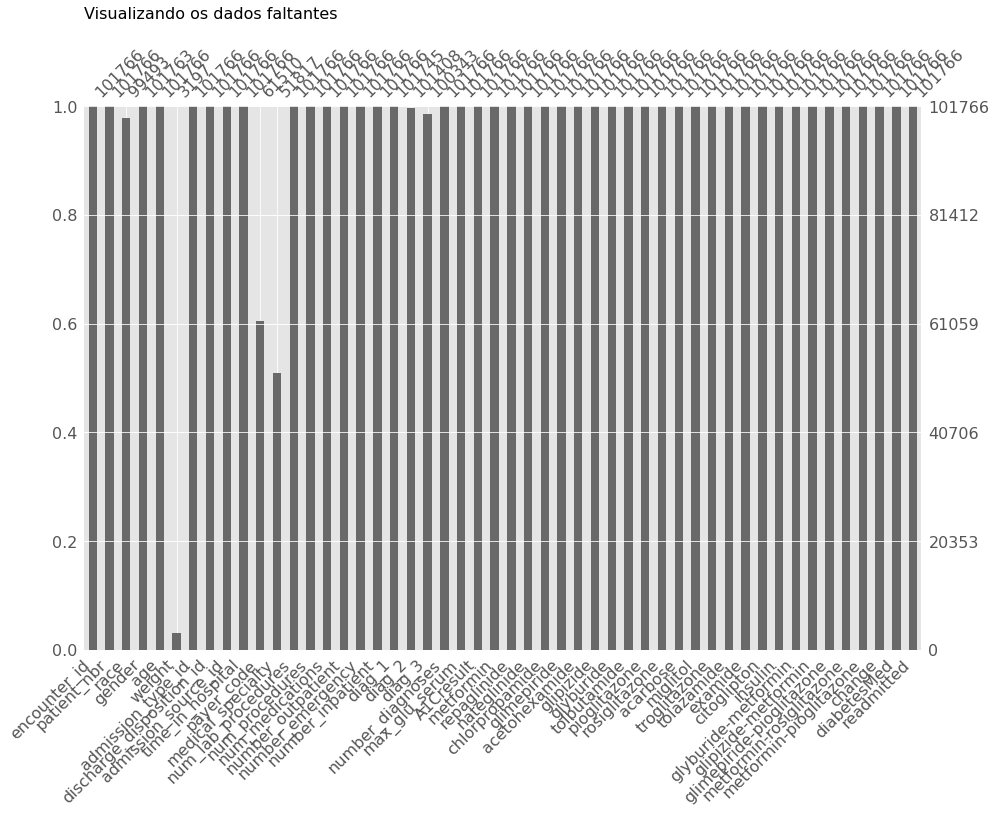

In [13]:
msno.bar(data, figsize=[15, 10])
plt.title('Visualizando os dados faltantes', y=1.15, size=16, loc='left')
plt.show()

#### Correlação de nulidade

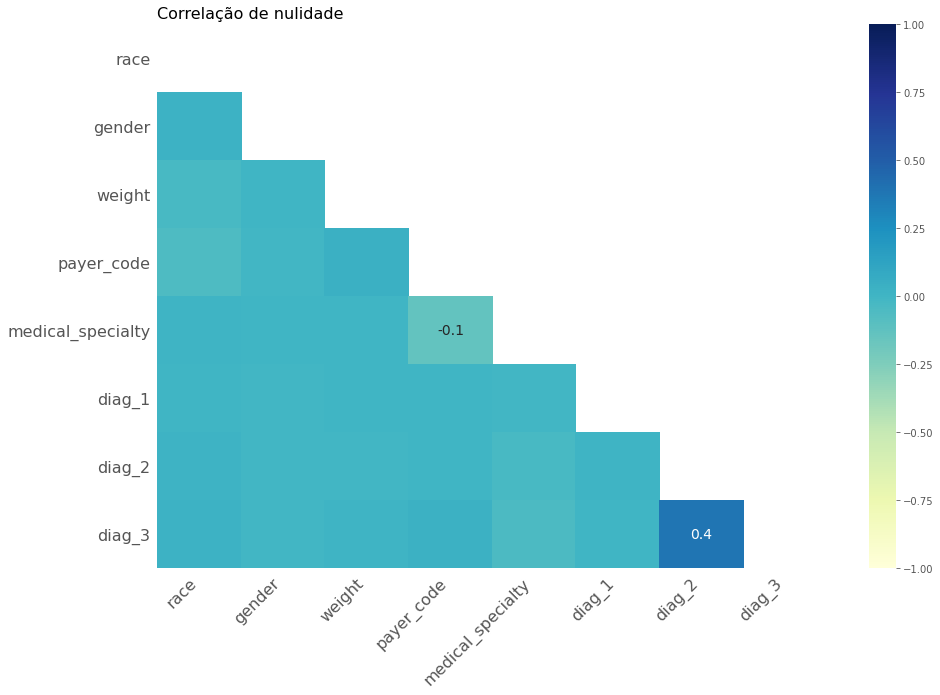

In [14]:
msno.heatmap(data, figsize=[15, 10], cmap='YlGnBu')
plt.title('Correlação de nulidade', y=1.15, size=16, loc='left')
plt.show()

#### Drop nas colunas com valores altos de nulos

In [15]:
data.drop(['weight', 'payer_code'], axis=1, inplace=True)

#### Substituição pela moda nas demais colunas

In [16]:
cols= ['race', 'diag_1', 'diag_2', 'diag_3', 'gender']
for c in cols:
    data[c].fillna(data[c].mode()[0], inplace=True)

In [17]:
data['medical_specialty'].fillna('Missing', inplace=True)

### Localizando outliers

- LOF (k)~ 1: semelhante aos vizinhos.
- LOF (k)< 1: inlier.
- LOF (k)> 1: outlier.

In [18]:
from sklearn.neighbors import LocalOutlierFactor

clf_outliers= LocalOutlierFactor(n_neighbors=3)
data['is_outlier']= clf_outliers.fit_predict(data[[c for c in data.columns if data[c].dtypes != 'O']])

count= data.query('is_outlier>1').count()
print(f'Total de outliers identificados: {sum(count)}')

Total de outliers identificados: 0


### Pré-processamento dos dados

In [19]:
data.dropna(inplace=True)

#### Mapeamento das colunas

In [20]:
data['gender'] = data['gender'].map({'Female': 0, 'Male': 1}).astype(int)

data['race'] = data['race'].map({'Caucasian': 0, 
                                 'AfricanAmerican': 1, 
                                 'Hispanic': 2, 
                                 'Other': 3, 
                                 'Asian': 4}).astype(int)

In [21]:
data['change'] = data['change'].map({'No': 0, 'Ch': 1}).astype(int)
data['diabetesMed'] = data['diabetesMed'].map({'No': 0, 'Yes': 1}).astype(int)

In [22]:
cols = [
        'metformin', 
        'repaglinide', 
        'nateglinide', 
        'chlorpropamide', 
        'glimepiride', 
        'acetohexamide', 
        'glipizide', 
        'glyburide', 
        'tolbutamide', 
        'pioglitazone', 
        'rosiglitazone', 
        'acarbose', 
        'miglitol', 
        'troglitazone', 
        'tolazamide', 
        'insulin',
        'glyburide-metformin', 
        'glipizide-metformin', 
        'metformin-rosiglitazone', 
        'metformin-pioglitazone'
]

for c in cols:
    data[c] = data[c].map({'No': 0, 'Steady': 1, 'Up': 2, 'Down': 3}).astype(int)

In [23]:
data['A1Cresult'] = data['A1Cresult'].map({'None': 0, '>8': 1, 'Norm': 2, '>7': 3}).astype(int)
data['max_glu_serum'] = data['max_glu_serum'].map({'None': 0, 'Norm': 1, '>200': 2, '>300': 3}).astype(int)

#### Removendo medicamentos que não foram receitados para nenhum paciente, uma vez que não fornecem informações significativas.

In [24]:
data.drop(['examide', 'citoglipton', 'glimepiride-pioglitazone'], axis=1, inplace=True)

### Remoção de registros do mesmo paciente

In [25]:
duplicated = data['patient_nbr'].duplicated().sum()
print(f'Total de registros do mesmo paciente: {duplicated}')

Total de registros do mesmo paciente: 30248


In [26]:
data.drop_duplicates(subset='patient_nbr', keep='first', inplace=True)
print(f'Linhas: {data.shape[0]} | Colunas: {data.shape[1]}')

Linhas: 71518 | Colunas: 46


### Remoção dos pacientes que faleceram ou que estão em cuidados paliativos

In [27]:
data=data[~data['discharge_disposition_id'].isin([11, 13, 14, 19, 20])]
print(f'Linhas: {data.shape[0]} | Colunas: {data.shape[1]}')

Linhas: 69973 | Colunas: 46


### Remoção dos Ids do conjunto de dados

In [28]:
data.drop(['encounter_id', 
           'patient_nbr', 
           'admission_type_id', 
           'discharge_disposition_id', 
           'admission_source_id',
           'is_outlier'], inplace=True, axis=1)

In [29]:
data.reset_index(drop=True, inplace=True)

### Engenharia de recursos

#### Quantidade de utilização do serviços hospitalares

In [30]:
data['use_hospital_services'] = data['number_outpatient'] + data['number_emergency'] + data['number_inpatient']

#### Número de alterações do medicamento

In [31]:
cols = [
        'metformin', 
        'repaglinide', 
        'nateglinide', 
        'chlorpropamide', 
        'glimepiride', 
        'acetohexamide', 
        'glipizide', 
        'glyburide', 
        'tolbutamide', 
        'pioglitazone', 
        'rosiglitazone', 
        'acarbose', 
        'miglitol', 
        'troglitazone', 
        'tolazamide', 
        'insulin',
        'glyburide-metformin', 
        'glipizide-metformin', 
        'metformin-rosiglitazone', 
        'metformin-pioglitazone'
]

for c in cols:
    name_cols = str(c)+'_is_change'
    data[name_cols] = data[c].apply(lambda x : 0 if(x==0 or x==1) else 1)

In [32]:
data['total_changes'] = 0

for c in cols:
    name_cols = str(c)+'_is_change'
    data['total_changes'] = data['total_changes'] + data[name_cols]
    del data[name_cols]

#### Covertendo a idade para um ponto médio da categoria de idades usando mediana

In [33]:
age = {
    '[0-10)':  int(np.median(np.arange(0, 11, 1))),
    '[10-20)': int(np.median(np.arange(10, 21, 1))), 
    '[20-30)': int(np.median(np.arange(20, 31, 1))),
    '[30-40)': int(np.median(np.arange(30, 41, 1))),
    '[40-50)': int(np.median(np.arange(40, 51, 1))),
    '[50-60)': int(np.median(np.arange(50, 61, 1))),
    '[60-70)': int(np.median(np.arange(60, 71, 1))),
    '[70-80)': int(np.median(np.arange(70, 81, 1))),
    '[80-90)': int(np.median(np.arange(80, 91, 1))),
    '[90-100)':int(np.median(np.arange(90, 101, 1)))
}

data['median_ages'] = data['age'].map(age)

#### Categorização dos diagnósticos

- **`Fonte:`** Artigo: Impact of HbA1c Measurement on Hospital Readmission Rates: Analysis of 70,000 Clinical Database Patient Records

#### 1: Circulatory | 2: Respiratory | 3: Digestive | 4: Diabetes | 5: Injury | 6: Musculoskeletal | 7: Genitourinary | 8: Neoplasms | 9: Other

In [34]:
data['categories_diag_1'] = data['diag_1']
data['categories_diag_2'] = data['diag_2']
data['categories_diag_3'] = data['diag_3']

In [35]:
data.loc[data['diag_1'].str.contains('V'), ['categories_diag_1']] = 0
data.loc[data['diag_2'].str.contains('V'), ['categories_diag_2']] = 0
data.loc[data['diag_3'].str.contains('V'), ['categories_diag_3']] = 0

data.loc[data['diag_1'].str.contains('E'), ['categories_diag_1']] = -1
data.loc[data['diag_2'].str.contains('E'), ['categories_diag_2']] = -1
data.loc[data['diag_3'].str.contains('E'), ['categories_diag_3']] = -1

In [36]:
data['categories_diag_1'] = data['categories_diag_1'].astype(float)
data['categories_diag_2'] = data['categories_diag_2'].astype(float)
data['categories_diag_3'] = data['categories_diag_3'].astype(float)

In [ ]:
convertDiagnosis(data, 'categories_diag_1')
data['categories_diag_1'] = data['categories_diag_1'].astype(int)

In [ ]:
convertDiagnosis(data, 'categories_diag_2')
data['categories_diag_2'] = data['categories_diag_2'].astype(int)

In [ ]:
convertDiagnosis(data, 'categories_diag_3')
data['categories_diag_3'] = data['categories_diag_3'].astype(int)

### Salvando o conjunto de dados pré-processado

In [ ]:
data.to_csv('data_cleaned.csv', index=False)

### Antes

In [37]:
print(f'Linhas: {data_orig.shape[0]} | Colunas: {data_orig.shape[1]}\n')
data_orig.head(5).T

Linhas: 101766 | Colunas: 50



,0,1,2,3,4
encounter_id,2278392,149190,64410,500364,16680
patient_nbr,8222157,55629189,86047875,82442376,42519267
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian
gender,Female,Female,Female,Male,Male
age,[0-10),[10-20),[20-30),[30-40),[40-50)
weight,?,?,?,?,?
admission_type_id,6,1,1,1,1
discharge_disposition_id,25,1,1,1,1
admission_source_id,1,7,7,7,7
time_in_hospital,1,3,2,2,1


### Depois

In [38]:
data_cleaned = pd.read_csv('data_cleaned.csv')

In [39]:
print(f'Linhas: {data_cleaned.shape[0]} | Colunas: {data_cleaned.shape[1]}\n')
data_cleaned.head(5).T

Linhas: 69973 | Colunas: 46



,0,1,2,3,4
race,0,0,1,0,0
gender,0,0,0,1,1
age,[0-10),[10-20),[20-30),[30-40),[40-50)
time_in_hospital,1,3,2,2,1
medical_specialty,Pediatrics-Endocrinology,Missing,Missing,Missing,Missing
num_lab_procedures,41,59,11,44,51
num_procedures,0,0,5,1,0
num_medications,1,18,13,16,8
number_outpatient,0,0,2,0,0
number_emergency,0,0,0,0,0


### 4) **(30%)** Análise

Com seu dado pronto, é hora de fazer a parte mais legal: investigar e responder nossas hipoteses. Elas se confirmam? Em quais cenários? Existe alguma forma de perceber isso no mundo real? Dica: Abuse das técnicas de visualização.

Ex: Ainda no contexto dos exemplos do item 2. Ao investigar a hipótese relacionada ao padrão de compra, percebi que em todos os meses existia uma diferença entre dia util e final de semana. Porém notei que Fevereiro possui um comportamento diferente, o que poderia explicar? Talvez o carnaval e seus feriados.

Ex2: Talvez eu descubra que alguns finais de semana possuam um comportamento diferente dos dias de semana e outros não. Por que não são todos? Nessa investigação você pode acabar descobrindo que os finais de semana que são diferentes, coincidem no fato de serem os primeiros dias utéis, o que pode remeter ao fato de boa parte das empresas realizarem pagamentos nessa parte do mês.

#### Distribuição de pacientes readmitidos ou não

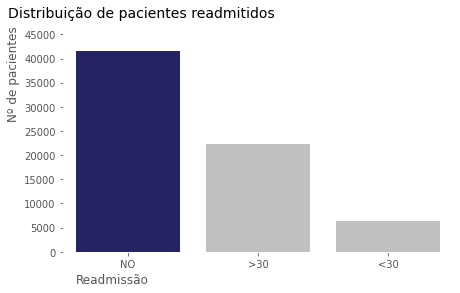

In [40]:
plt.rcParams['axes.facecolor']='white'
plt.rcParams['figure.figsize'] = [7, 4]
plt.rcParams['font.family'] = 'Arial, Helvetica, sans-serif'

sns.countplot(data_cleaned['readmitted'], palette=['#191970', '#C0C0C0', '#C0C0C0'])

plt.title('Distribuição de pacientes readmitidos', y=1.05, size=14, loc='left', x=-0.14)
plt.ylabel('Nº de pacientes', horizontalalignment='left', y=0.60)
plt.xlabel('Readmissão', horizontalalignment='right', x=0.22)
plt.ylim(0, 45000)
plt.show()

Percebe-se um desequilíbrio entre as classes, uma vez que o número de pacientes **não readmitidos** é maior (~60%).

#### Tempo no hospital vs. readmissão

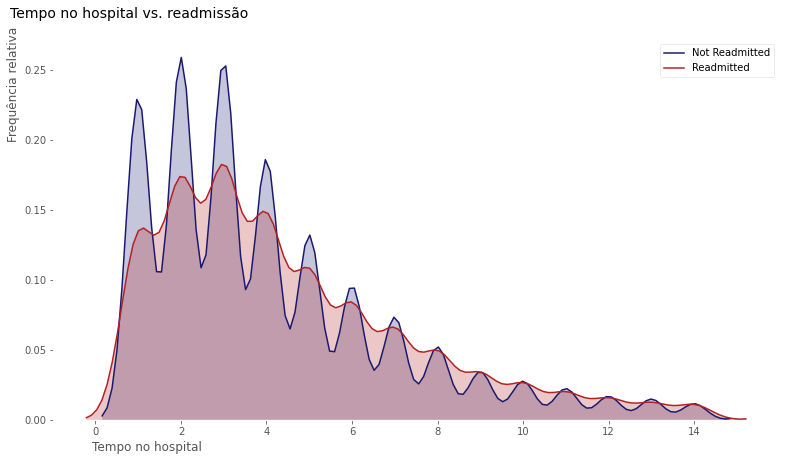

In [41]:
plt.rcParams['figure.figsize'] = [13, 7]
plt.rcParams['font.family'] = 'Arial, Helvetica, sans-serif'

ax=sns.kdeplot(data_cleaned.loc[(data_cleaned['readmitted'] == 'NO'),'time_in_hospital'], 
               color='#191970', 
               shade=True, 
               label='Not Readmitted')

ax=sns.kdeplot(data_cleaned.loc[(data_cleaned['readmitted'] != 'NO'),'time_in_hospital'], 
               color='#B22222', 
               shade=True, 
               label='Readmitted')

plt.title('Tempo no hospital vs. readmissão', y=1.04, size=14, loc='left', x=-0.06)
plt.ylabel('Frequência relativa', horizontalalignment='left', y=0.73)
plt.xlabel('Tempo no hospital', horizontalalignment='right', x=0.205)
plt.show()

A medida que o tempo no hospital aumenta, a distribuição de admitidos e não admitidos se torna mais próxima.

#### Média das idades vs. readmissão

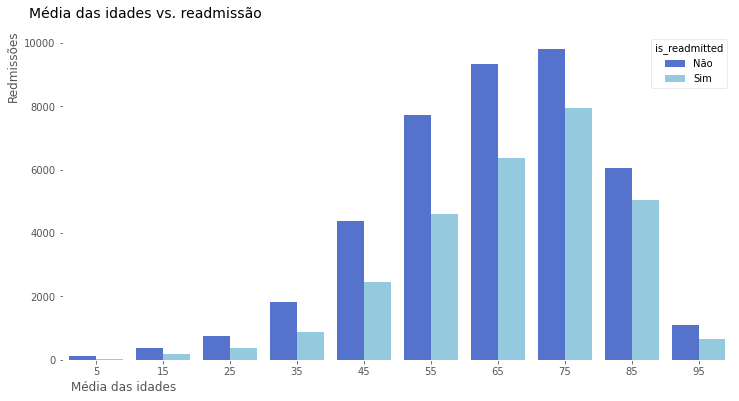

In [42]:
plt.rcParams['figure.figsize'] = [12, 6]


data_cleaned['is_readmitted'] = data_cleaned['readmitted'].map({'NO': 'Não', '>30': 'Sim', '<30': 'Sim'})
sns.countplot(x='median_ages', hue='is_readmitted', data=data_cleaned, palette=['#4169E1', '#87CEEB'])

plt.title('Média das idades vs. readmissão', y=1.03, size=14, loc='left', x=-0.05)
plt.ylabel('Redmissões', horizontalalignment='left', y=0.79)
plt.xlabel('Média das idades', horizontalalignment='right', x=0.17)
plt.show()

A idade não parece influenciar as readmissões, porém essa impressão pode ter sido causada pelo desbalanceamento da base de dados. Podemos inferir que aqueles que se encontram na média dos 75 anos (70-80) são os que mais possuem casos de readmissão e não readmissão.

#### Etnia do paciente vs. readmissões

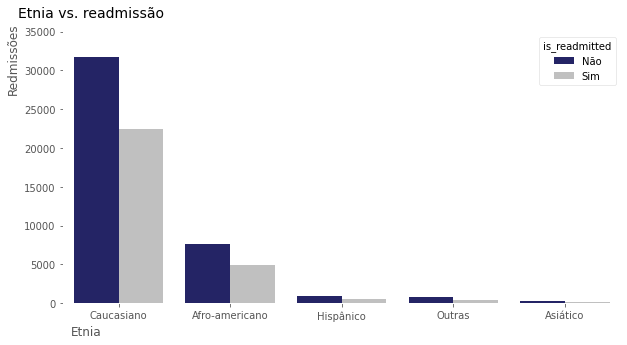

In [43]:
labels = ['Caucasiano', 'Afro-americano', 'Hispânico', 'Outras', 'Asiático']
ticks = [0, 1, 2, 3, 4]

plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['font.family'] = 'Arial, Helvetica, sans-serif'

sns.countplot(x='race', hue='is_readmitted', data=data_cleaned, palette=['#191970', '#C0C0C0'])

plt.title('Etnia vs. readmissão', y=1.03, size=14, loc='left', x=-0.08)
plt.ylabel('Redmissões', horizontalalignment='left', y=0.77)
plt.xlabel('Etnia', horizontalalignment='right', x=0.07)
plt.xticks(ticks, labels)
plt.ylim(0, 35000)
plt.show()

A etnia do paciente também parece não influenciar nas readmissões, assim como a idade. Na base, temos uma incidência maior para pacientes caucasianos.

#### Gênero vs. readmissões

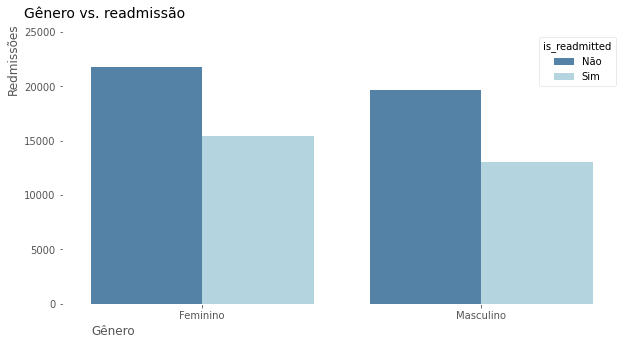

In [44]:
labels = ['Feminino', 'Masculino']
ticks = [0, 1]

plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['font.family'] = 'Arial, Helvetica, sans-serif'

sns.countplot(x='gender', hue='is_readmitted', data=data_cleaned, palette=['#4682B4', '#ADD8E6'])

plt.title('Gênero vs. readmissão', y=1.03, size=14, loc='left', x=-0.07)
plt.ylabel('Redmissões', horizontalalignment='left', y=0.77)
plt.xlabel('Gênero', horizontalalignment='right', x=0.13)
plt.xticks(ticks, labels)
plt.ylim(0, 25000)
plt.show()

Em relação às admissões, temos uma recorrência maior entre as mulheres, em ambas as situações.

#### Teste de glicose vs. readmissão

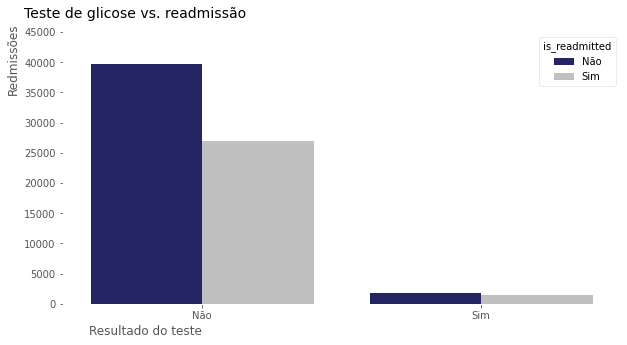

In [49]:
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['font.family'] = 'Arial, Helvetica, sans-serif'

data_cleaned['is_max_glu_serum'] = data_cleaned['max_glu_serum'].map({0: 'Não', 1: 'Sim', 2: 'Sim', 3: 'Sim'})

sns.countplot(x='is_max_glu_serum', hue='is_readmitted', data=data_cleaned, palette=['#191970', '#C0C0C0'])

plt.title('Teste de glicose vs. readmissão', y=1.03, size=14, loc='left', x=-0.07)
plt.ylabel('Redmissões', horizontalalignment='left', y=0.77)
plt.xlabel('Resultado do teste', horizontalalignment='right', x=0.25)
plt.ylim(0, 45000)
plt.show()

A base possui apenas 4.78% dos pacientes registrados como quem fez o teste de glicose. Não podemos inferir que a falta deste teste impacta nos casos de readmisão.

#### Teste A1C vs. readmissão

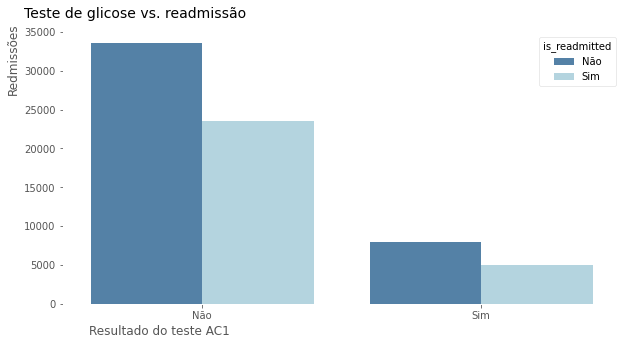

In [53]:
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['font.family'] = 'Arial, Helvetica, sans-serif'

data_cleaned['is_A1Cresult'] = data_cleaned['A1Cresult'].map({0: 'Não', 1: 'Sim', 2: 'Sim', 3: 'Sim'})
sns.countplot(x='is_A1Cresult', hue='is_readmitted', data=data_cleaned, palette=['#4682B4', '#ADD8E6'])

plt.title('Teste de glicose vs. readmissão', y=1.03, size=14, loc='left', x=-0.07)
plt.ylabel('Redmissões', horizontalalignment='left', y=0.77)
plt.xlabel('Resultado do teste AC1', horizontalalignment='right', x=0.30)
plt.ylim(0, 35000)
plt.show()

No geral, apenas 18,35% dos pacientes dessa base fizeram o teste AC1. Fazendo uma análise mais direcionada, temos que 61% dos pacientes, de um total de 12.845 que fizeram o exame, voltaram a ser readmitidos. Quanto aos 57.128 que não fizeram o exame, 58,75% foram readmitidos.

#### Diagnóstico inicial vs. readmissão

#### A maior causa da readmissão de um paciente

#### Correlação dos dados

### 5) Modelagem 30%

Agora você terá mais uma oportunidade de mostrar o que você aprendeu durante o módulo 2 quanto a modelagem de dados e criação de modelos. Utilizando os dados preparados na seção 1 e após a análise feita na seção 2 você deverá:
1. **Defina um problema de regressão ou classificação que envolva uma variável dos seus dados.**

***---> Comente brevemente sua decisão aqui.***

#### Amostragem extratificada para nivelar as classes

In [ ]:
data_cleaned['readmitted'].value_counts()

In [ ]:
sample = data_cleaned.groupby(['readmitted']).apply(lambda x : x.sample(n=6277, replace=False))
sample['readmitted'].value_counts()

2. **Realize ao menos 2 técnicas de processamento e seleção de features.**
    * Isto inclui, normalização, PCA, e técnicas de seleção de features como information gain. Seja criativo pois está parte é crucial para seu modelo. Você pode escolhar manualmente as features desde que seja justificada na seção 2 (parte de Análise).


3. **Defina uma métrica para avaliar o seu modelo.**
    * Por exemplo, você pode utilizar MAE (Mean Absolute Error) para um problema de regressão. Ou, F1-Score para um problema de classificação. Há varias métricas, então escolha sabiamente.


***---> Comente brevemente sua decisão aqui.***

4. **Divida seus dados em 2 conjuntos. Um de treino e outro conjunto de teste.**
    * Treine e otimize seu modelo no conjunto de treino e apenas use o conjunto de teste para apresentar os resultados finais.


5. **Treine um ou mais modelos de ML para o seu problema.**
    * Escolha 1 ou mais tipos de classificadores ou regressores dependendo do seu problema.
    * Por exemplo, TreeClassifier para um problema de classificação. 
    * Use cross-validation e outras técnicas como GridSearch e ou RandomizedSearch para encontrar os melhores parametros para o seu modelo.


6. **Apresente (com visualizações) os resultados do seu modelo mostrando que ele é melhor do que um baseline não aleatório.**
    * Para o baseline, você pode escolher um modelo bem trivial mas não aleatório. Por exemplo, para um problema de classificação um baseline pode ser a classe mais presente caso o conjunto de dados seja desbalanceado.  Um modelo mais simples também pode ser utilizado como baseline, por exemplo, você escolheu um Random Forest Classifier, e comparou os resultados um Logistic Regression. Você pode até mesmo escolher um modelo de AutoML(como TPOT) como Baseline.

### 6) Conclusões **10%**

*Partindo das suas hipoteses e investigações, o que você consegue concluir? Suas hipoteses se concretizaram?*